# Heart Disease

In [27]:
# import các thư viện cơ bản
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files



In [3]:
# Kết nối Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# Load dataset từ Google Drive
df = pd.read_csv('/content/drive/MyDrive/Heart_Disease_Prediction/heart_disease.csv')


In [5]:
# Xem 5 dòng đầu tập dữ liệu
df.head(5)

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


In [6]:
# Xem 5 dòng cuối dữ liệu
df.tail(5)

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
4233,Male,50,uneducated,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,graduate,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No
4235,Female,48,primaryschool,1,20.0,NaN,no,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No
4236,Female,44,uneducated,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No
4237,Female,52,primaryschool,0,0.0,0.0,no,0,0,269.0,133.5,83.0,21.47,80.0,107.0,No


## Xử lý dữ liệu

In [7]:
# Xem các thuộc tính
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'Heart_ stroke'],
      dtype='object')

Do thuộc tính education (trình độ học vấn) không liên quan đến vấn đề bệnh tim hay không nên sẽ loại bỏ thuộc tính này

In [8]:
# Loại bỏ cột education
df.drop(columns = ['education'], inplace = True)

In [9]:
# Kiểm tra các loại dữ liệu của các thuộc tính, số lượng giá trị, mức sử dụng bộ nhớ, v.v.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   object 
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(3)
memory usage: 496.8+ KB


In [10]:
# Kiểm tra định dạng của tập dữ liệu, hàng, cột và các giá trị bị thiếu
print(f'Số dòng trên tập dữ liệu: {df.shape[0]}')
print(f'Số cột trên tập dữ liệu:: {df.shape[1]}')
print(f'Tổng số giá trị trên tập dữ liệu: {df.count().sum()}')
print(f'Tổng số giá trị bị thiếu: {sum(df.isna().sum())}')

Số dòng trên tập dữ liệu: 4238
Số cột trên tập dữ liệu:: 15
Tổng số giá trị trên tập dữ liệu: 63030
Tổng số giá trị bị thiếu: 540


In [11]:
## Xác định số lượng giá trị null theo thuộc tính
pd.isna(df).sum()[pd.isna(df).sum() > 0]

cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64

In [12]:
## Tiến hành loại bỏ giá trị null

## Giá trị null trong các biến số
df.glucose.fillna(df.glucose.median(),inplace = True)
df.cigsPerDay.fillna(df.cigsPerDay.median(),inplace = True)
df.totChol.fillna(df.totChol.median(),inplace = True)
df.BMI.fillna(df.BMI.median(),inplace = True)
df.heartRate.fillna(df.heartRate.median(),inplace = True)

## Giá trị thiếu trong các biến phân loại
df.BPMeds = df.BPMeds.fillna(df.BPMeds.mode().iloc[0])

## Kiểm tra xem các giá trị null đã bị xóa hay chưa sau khi xử lý chúng
pd.isna(df).sum()[pd.isna(df).sum() > 0]

Series([], dtype: int64)

In [13]:
## Kiểm tra xem các giá trị null đã bị xóa hay chưa sau khi xử lý chúng
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4238 non-null   float64
 4   BPMeds           4238 non-null   float64
 5   prevalentStroke  4238 non-null   object 
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4238 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4238 non-null   float64
 12  heartRate        4238 non-null   float64
 13  glucose          4238 non-null   float64
 14  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(3)
memory usage: 496.8+ KB


In [14]:
df['Heart_ stroke'].value_counts()

No     3594
yes     644
Name: Heart_ stroke, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

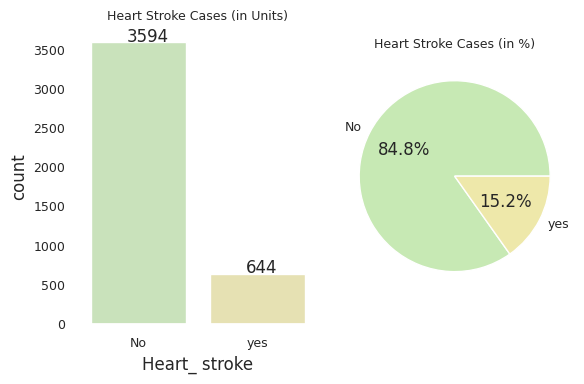

In [15]:
## Let's have a broader look at Heart Disease, the target variable in our analysis

sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':9,'ytick.labelsize':9, 'figure.autolayout':True})
my_col = ('#c7e9b4', '#EEE8AA')

plt.figure(figsize=(6,4))

## Heart Stroke Cases (in Units)

plt.subplot(1,2,1)

plt.title('Heart Stroke Cases (in Units)', fontdict={'fontsize':9})
ax = sns.countplot(x="Heart_ stroke", data=df, palette=my_col, order=df['Heart_ stroke'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+8))

## Heart Stroke Cases (in %)

plt.subplot(1,2,2)
plt.title('Heart Stroke Cases (in %)', fontdict={'fontsize':9})
df['Heart_ stroke'].value_counts().plot(kind='pie', colors=my_col, legend=None, ylabel='', autopct='%1.1f%%')
plt.savefig("count_class.jpeg", format='jpeg', dpi=100)
files.download('count_class.jpeg') 
plt.show()

Nhận xét:
1.   Bộ dữ liệu bị mất cân bằng do số trường hợp đột quỵ tim thấp hơn nhiều so với 
trường hợp không bị đột quy tim (644 so với 3594)
2.   Về tỷ lệ phần trăm, các trường hợp đột quỵ tim chỉ chiếm khoảng 15% tổng số trường hợp.



<ipython-input-20-d83a6700fc2a>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age, color='#c7e9b4', kde_kws={'linewidth':2,'color':'r'})
<ipython-input-20-d83a6700fc2a>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.cigsPerDay, color="#c7e9b4", kde_kws={'linewidth':2,'color':'r'})
<

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

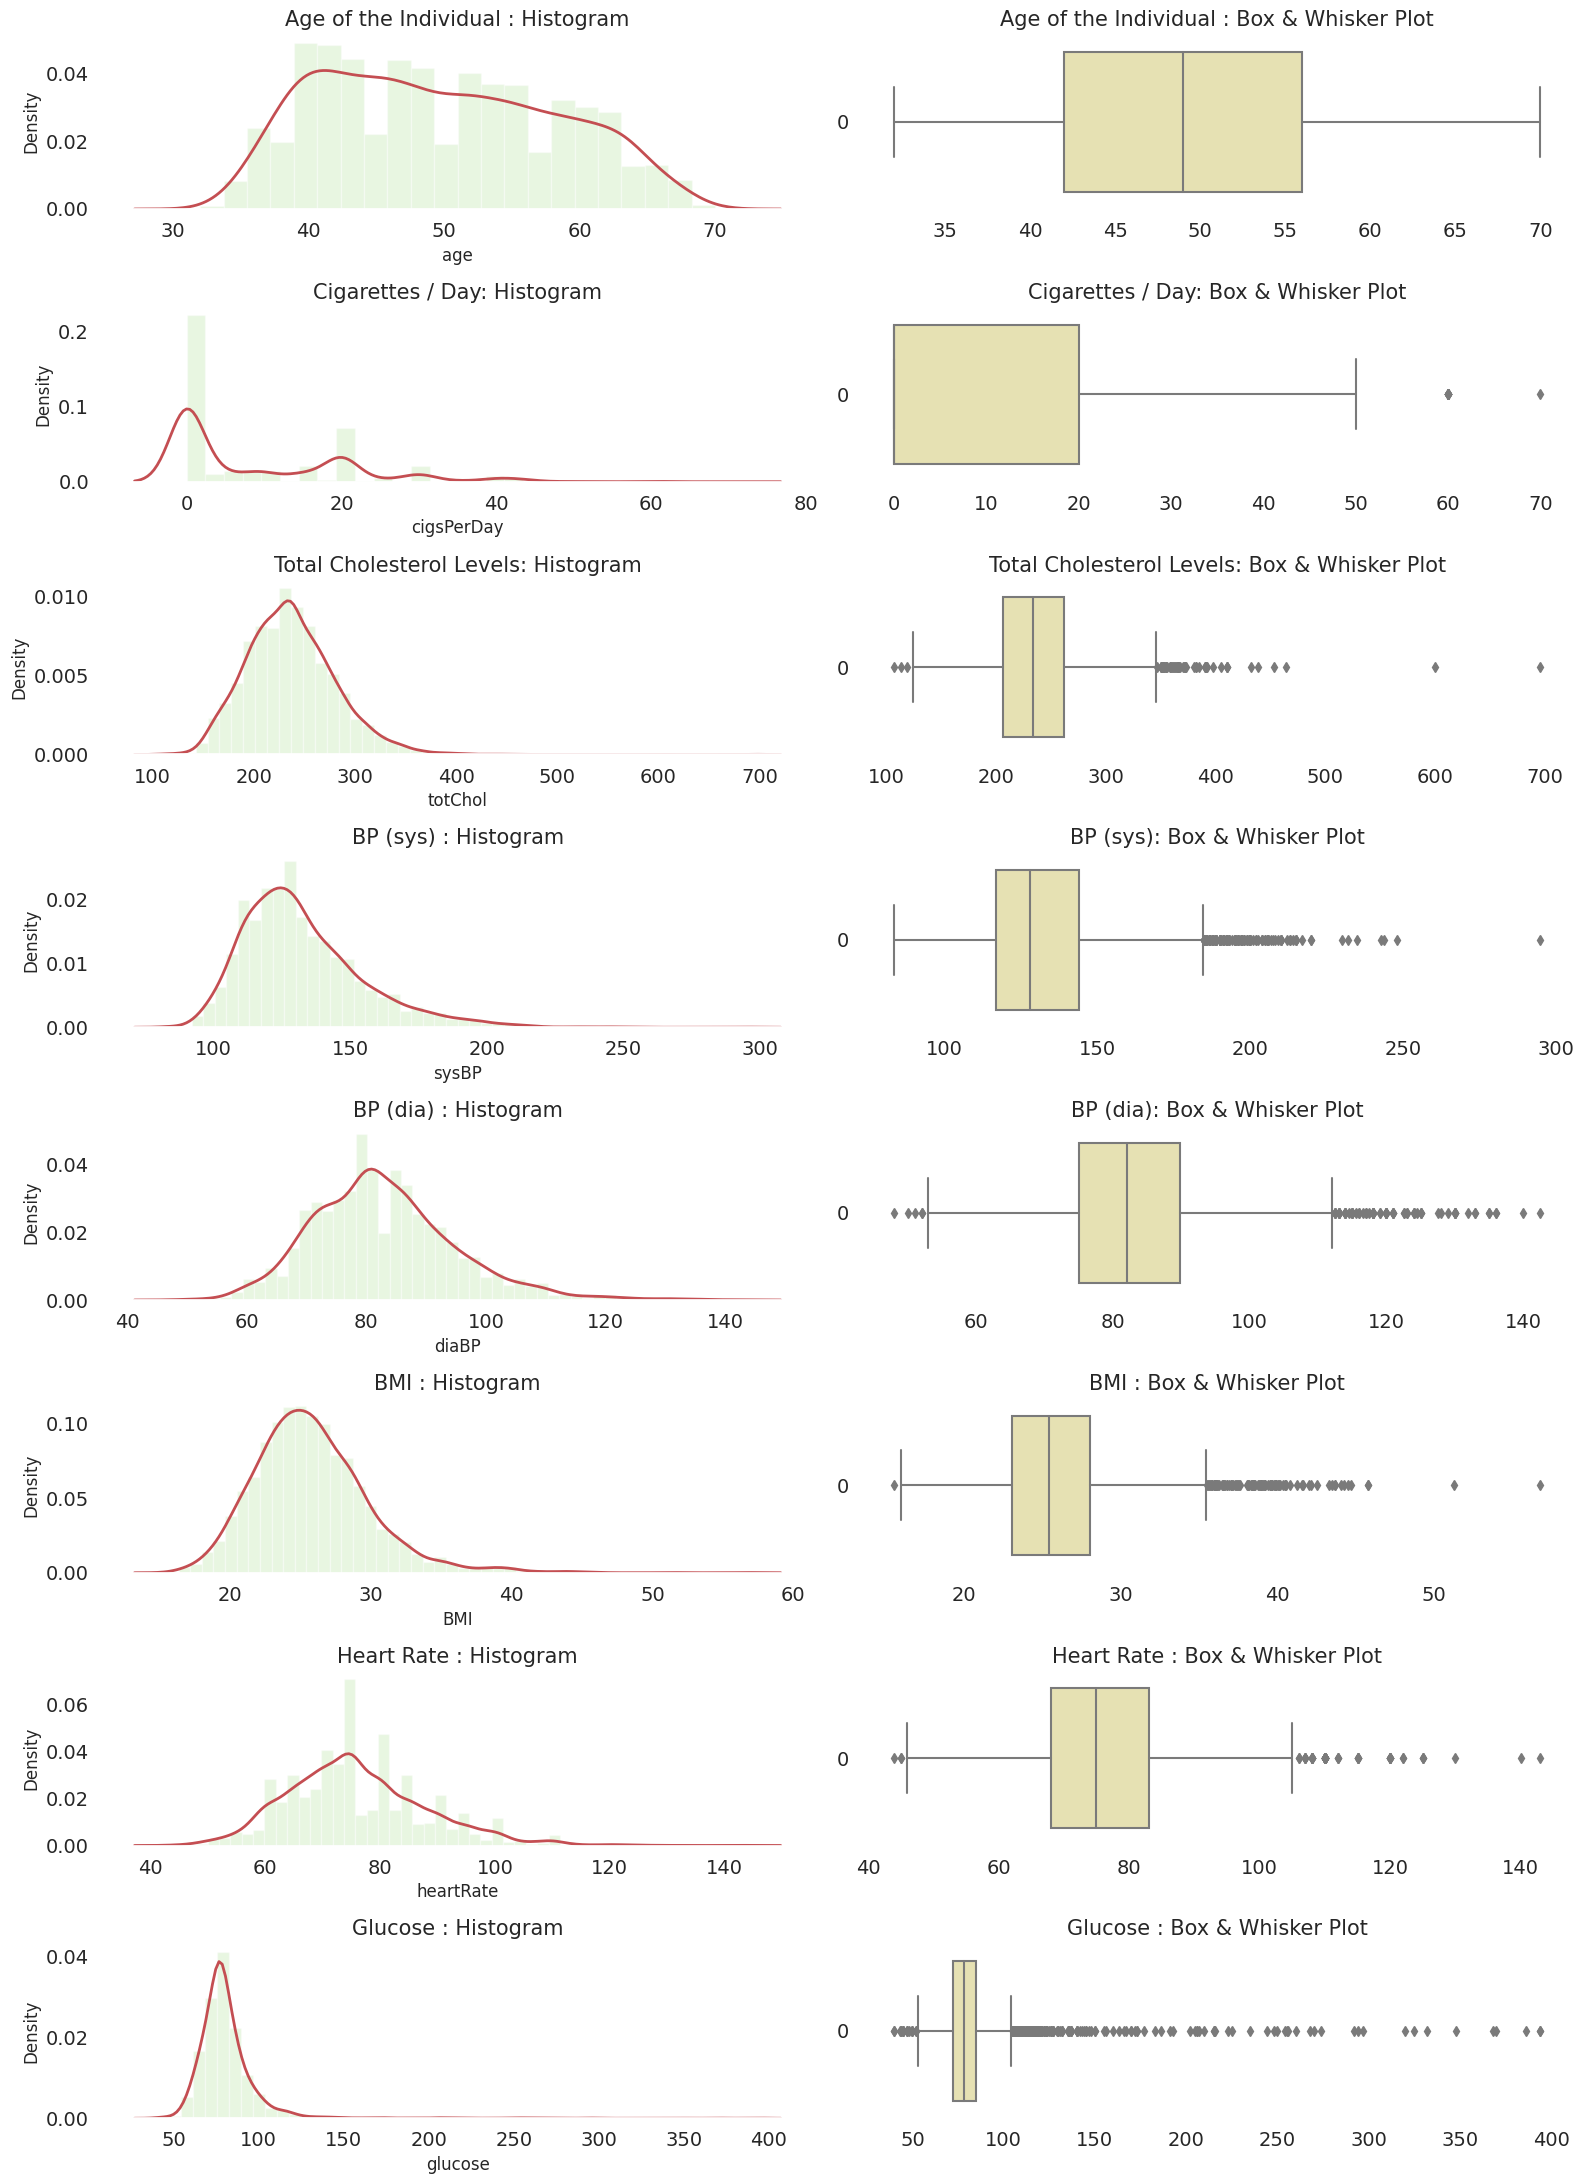

In [20]:
## Let's have a look at the distribtuion in numerical features through histogram and box-whisker plots

sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':14,'ytick.labelsize':14, 'figure.autolayout':True})
plt.figure(figsize=(16,22))

## Age of the Individual

plt.subplot(8,2,1)
plt.title('Age of the Individual : Histogram', fontdict={'fontsize':15})
sns.distplot(df.age, color='#c7e9b4', kde_kws={'linewidth':2,'color':'r'})
plt.subplot(8,2,2)
plt.title('Age of the Individual : Box & Whisker Plot', fontdict={'fontsize':15})
sns.boxplot(df.age, orient="h", color='#EEE8AA')

## Cigarettes / Day

plt.subplot(8,2,3)
plt.title('Cigarettes / Day: Histogram', fontdict={'fontsize':15})
sns.distplot(df.cigsPerDay, color="#c7e9b4", kde_kws={'linewidth':2,'color':'r'})
plt.subplot(8,2,4)
plt.title('Cigarettes / Day: Box & Whisker Plot', fontdict={'fontsize':15})
sns.boxplot(df.cigsPerDay, orient="h", color="#EEE8AA")

## Cholesterol Levels

plt.subplot(8,2,5)
plt.title('Total Cholesterol Levels: Histogram', fontdict={'fontsize':15})
sns.distplot(df.totChol, color="#c7e9b4", kde_kws={'linewidth':2,'color':'r'})
plt.subplot(8,2,6)
plt.title('Total Cholesterol Levels: Box & Whisker Plot', fontdict={'fontsize':15})
sns.boxplot(df.totChol, orient="h", color="#EEE8AA")

## Systolic Blood Pressure

plt.subplot(8,2,7)
plt.title('BP (sys) : Histogram', fontdict={'fontsize':15})
sns.distplot(df.sysBP, color="#c7e9b4", kde_kws={'linewidth':2,'color':'r'})
plt.subplot(8,2,8)
plt.title('BP (sys): Box & Whisker Plot', fontdict={'fontsize':15})
sns.boxplot(df.sysBP, orient="h", color="#EEE8AA")

## Diastolic Blood Pressure

plt.subplot(8,2,9)
plt.title('BP (dia) : Histogram', fontdict={'fontsize':15})
sns.distplot(df.diaBP, color="#c7e9b4", kde_kws={'linewidth':2,'color':'r'})
plt.subplot(8,2,10)
plt.title('BP (dia): Box & Whisker Plot', fontdict={'fontsize':15})
sns.boxplot(df.diaBP, orient="h", color="#EEE8AA")

## BMI

plt.subplot(8,2,11)
plt.title('BMI : Histogram', fontdict={'fontsize':15})
sns.distplot(df.BMI, color="#c7e9b4", kde_kws={'linewidth':2,'color':'r'})
plt.subplot(8,2,12)
plt.title('BMI : Box & Whisker Plot', fontdict={'fontsize':15})
sns.boxplot(df.BMI, orient="h", color="#EEE8AA")

## Heart Rate

plt.subplot(8,2,13)
plt.title('Heart Rate : Histogram', fontdict={'fontsize':15})
sns.distplot(df.heartRate, color="#c7e9b4", kde_kws={'linewidth':2,'color':'r'})
plt.subplot(8,2,14)
plt.title('Heart Rate : Box & Whisker Plot', fontdict={'fontsize':15})
sns.boxplot(df.heartRate, orient="h", color="#EEE8AA")

## Glucose

plt.subplot(8,2,15)
plt.title('Glucose : Histogram', fontdict={'fontsize':15})
sns.distplot(df.glucose, color="#c7e9b4", kde_kws={'linewidth':2,'color':'r'})
plt.subplot(8,2,16)
plt.title('Glucose : Box & Whisker Plot', fontdict={'fontsize':15})
sns.boxplot(df.glucose, orient="h", color="#EEE8AA");
plt.savefig("histogram and box-whisker plots.jpeg", format='jpeg', dpi=100)
files.download('histogram and box-whisker plots.jpeg') 
plt.show()

Nhận xét

1. Có thể thấy một số thuộc tính (trên thực tế, gần như tất cả) có ngoại lệ.
2. Thuộc tính glucose có số lượng ngoại lệ cao hơn
3. Các thuộc tính Total Cholesteron, BMI và Glucose có phân bố hình chuông (bình thường).



<ipython-input-237-4167ad04f053>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,2,1)


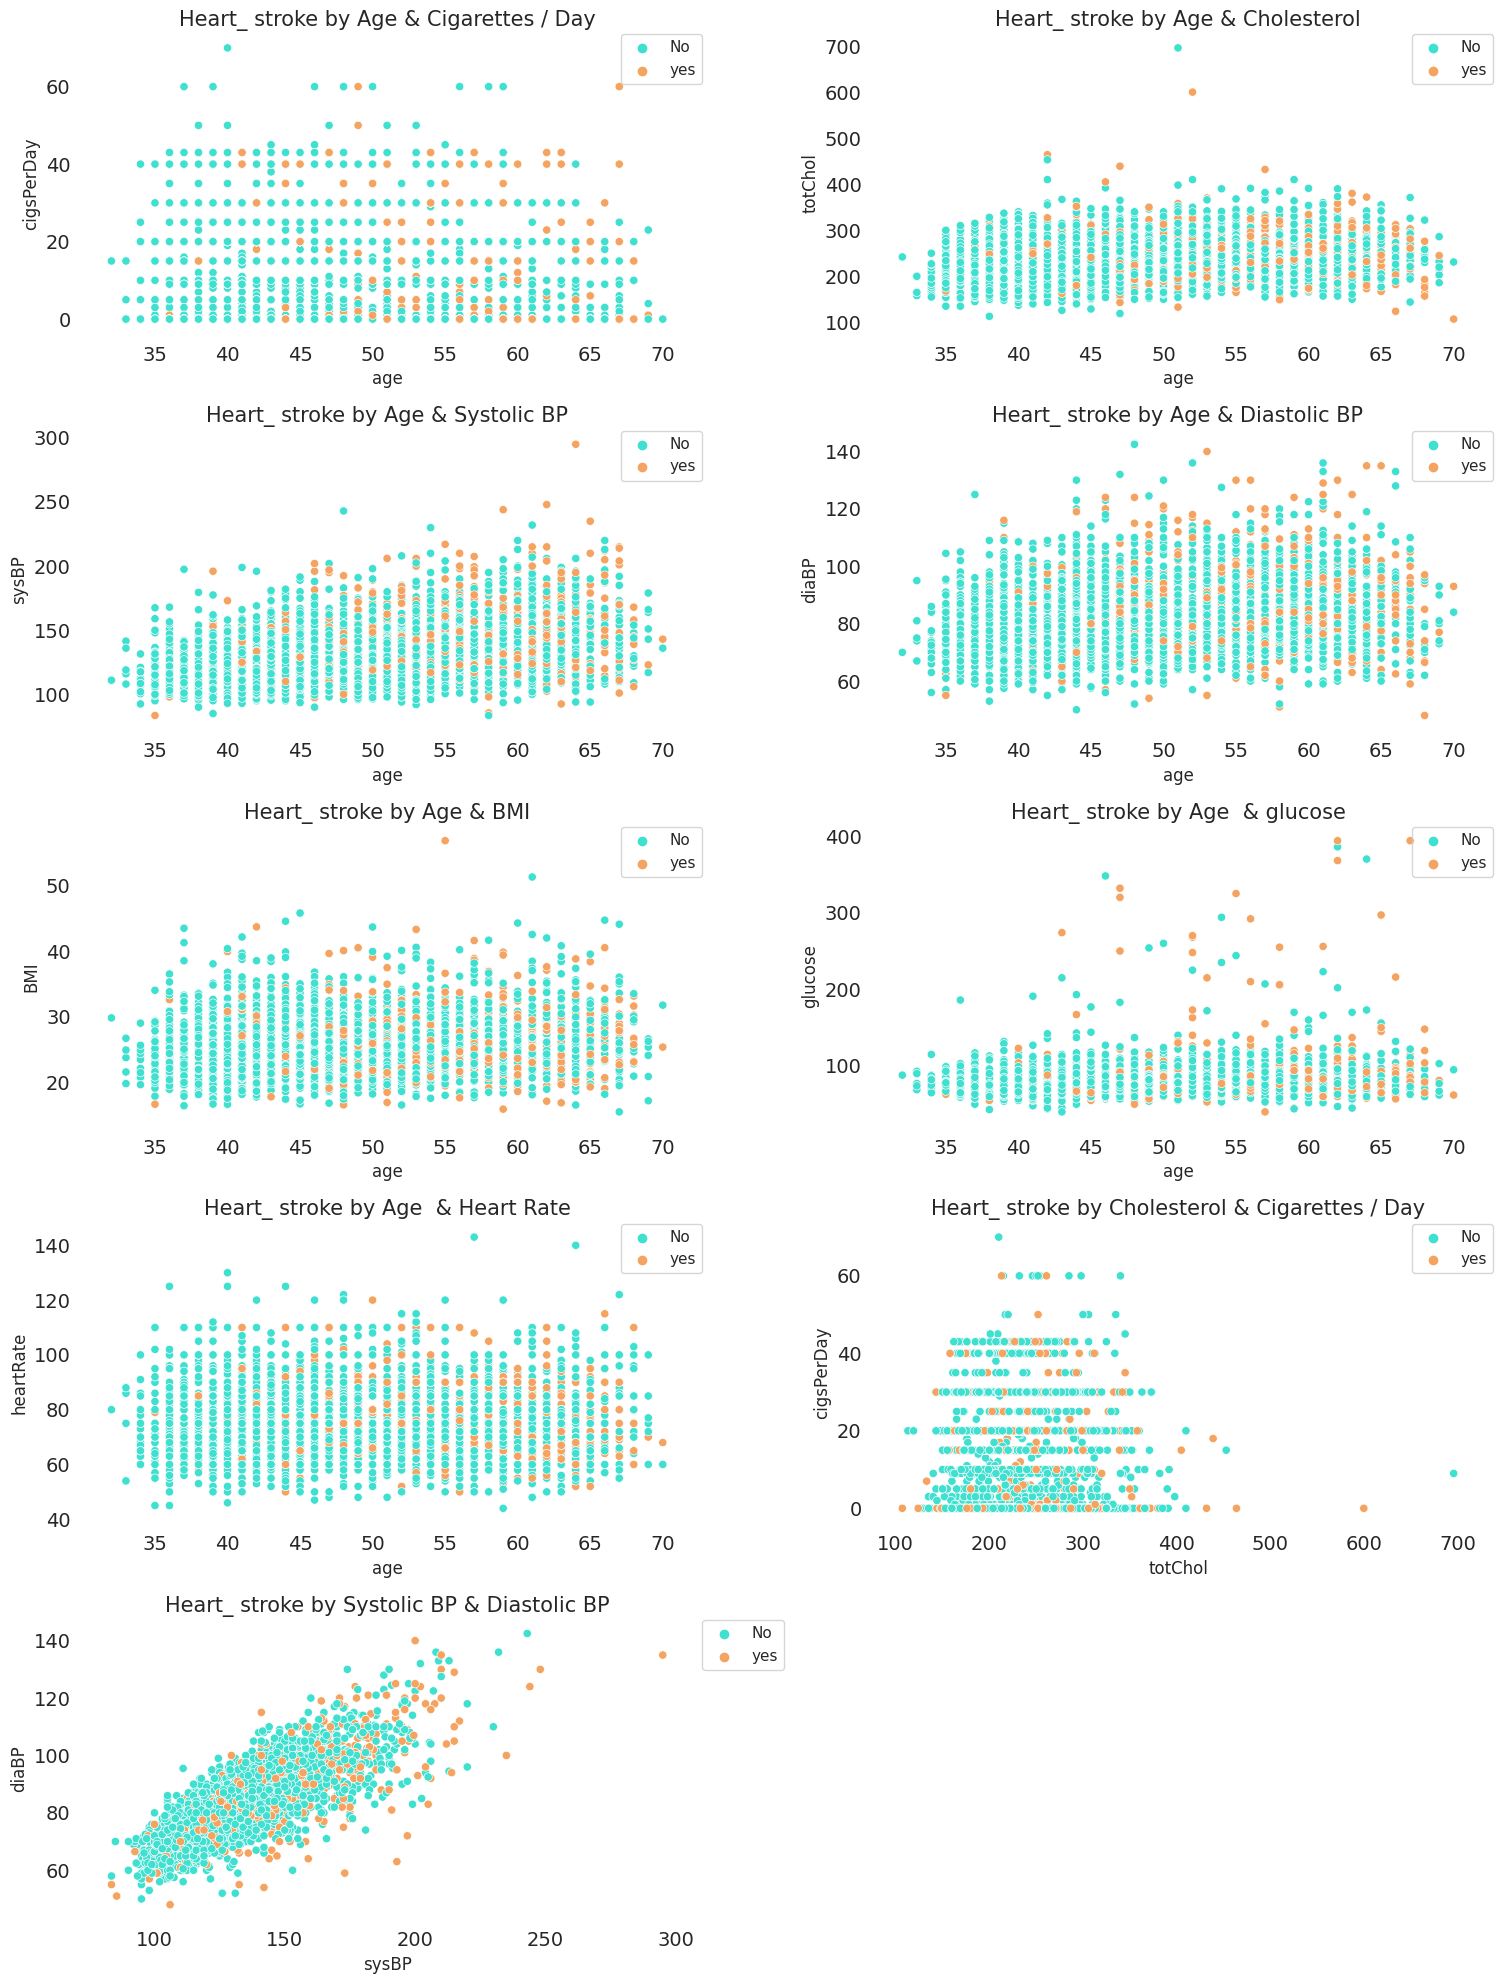

In [ ]:
## Now let's understand the impact of a combination of two numerical variables on Heart Stroke occurence

sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':14,'ytick.labelsize':14, 'figure.autolayout':True})
plt.subplots(figsize=(16,20))
my_pal = ("#40E0D0", "#F4A460")

plt.subplot(5,2,1)
plt.title('Heart_ stroke by Age & Cigarettes / Day', fontdict={'fontsize':15})
sns.scatterplot(x='age', y='cigsPerDay', hue='Heart_ stroke', palette=my_pal, data=df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)

plt.subplot(5,2,2)
plt.title('Heart_ stroke by Age & Cholesterol', fontdict={'fontsize':15})
sns.scatterplot(x='age', y='totChol', hue='Heart_ stroke', palette=my_pal, data=df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)

plt.subplot(5,2,3)
plt.title('Heart_ stroke by Age & Systolic BP', fontdict={'fontsize':15})
sns.scatterplot(x='age', y='sysBP', hue='Heart_ stroke', palette=my_pal, data=df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)

plt.subplot(5,2,4)
plt.title('Heart_ stroke by Age & Diastolic BP', fontdict={'fontsize':15})
sns.scatterplot(x='age', y='diaBP', hue='Heart_ stroke', palette=my_pal, data=df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)

plt.subplot(5,2,5)
plt.title('Heart_ stroke by Age & BMI', fontdict={'fontsize':15})
sns.scatterplot(x='age', y='BMI', hue='Heart_ stroke', palette=my_pal, data=df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)

plt.subplot(5,2,6)
plt.title('Heart_ stroke by Age  & glucose', fontdict={'fontsize':15})
sns.scatterplot(x='age', y='glucose', hue='Heart_ stroke', palette=my_pal, data=df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)

plt.subplot(5,2,7)
plt.title('Heart_ stroke by Age  & Heart Rate', fontdict={'fontsize':15})
sns.scatterplot(x='age', y='heartRate', hue='Heart_ stroke', palette=my_pal, data=df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)

plt.subplot(5,2,8)
plt.title('Heart_ stroke by Cholesterol & Cigarettes / Day', fontdict={'fontsize':15})
sns.scatterplot(x='totChol', y='cigsPerDay', hue='Heart_ stroke', palette=my_pal, data=df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)

plt.subplot(5,2,9)
plt.title('Heart_ stroke by Systolic BP & Diastolic BP', fontdict={'fontsize':15})
sns.scatterplot(x='sysBP', y='diaBP', hue='Heart_ stroke', palette=my_pal, data=df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)

plt.show()

Nhận xét:
1. Không có nhiều mối tương quan giữa hầu hết các tính năng số và biến mục tiêu (đột quỵ tim).
2. HA tâm trương và HA tâm thu cho thấy một số mức độ tương quan. Và trong các tính năng còn lại, không có bất kỳ mối tương quan rõ ràng nào.
3. Nói chung, người ta nói rằng cholesterol và hút thuốc có mối tương quan trực tiếp với bệnh tim và đột quỵ tim, nhưng từ dữ liệu hiện tại, rất khó để thấy mối tương quan chặt chẽ như vậy.

In [16]:
## Tiến hành nhóm các thuộc tính số & thuộc tính phân loại

num_df = df[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']] 
cat_df = df[['Gender', 'diabetes', 'BPMeds', 'prevalentStroke', 'prevalentHyp']]

In [17]:
## Thư viện hỗ trợ xử lý dữ liệu
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [18]:
## Chuyển đổi các dữ liệu chữ thành số

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder ()

#select ctegorical columns 
cat_df = df.select_dtypes(exclude=["int", "float"])

for i in cat_df:
    cat_df[i] = le.fit_transform(df[i])

#joining the data to the numeric data
num_df = df.select_dtypes(include=['int', 'float'])
main_df = pd.concat([num_df, cat_df], axis=1)
main_df.head(5)

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Gender,prevalentStroke,Heart_ stroke
0,39,0,0.0,0.0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,1,0,0
1,46,0,0.0,0.0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,0
2,48,1,20.0,0.0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,1,0,0
3,61,1,30.0,0.0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,0,0,1
4,46,1,23.0,0.0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0,0


In [19]:
##  Scaling the Data 

## For features with normal distribution, we use Standardisation with StandardScaler
## For features with skewed distribution, we use Normalisation with MinMaxscaler

## So first we'll have a glance at skewness of features before proceeding with scaling
df.skew(axis = 0)

<ipython-input-19-2c93c0ef6381>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis = 0)


age              0.228146
currentSmoker    0.023606
cigsPerDay       1.257472
BPMeds           5.588351
prevalentHyp     0.819278
diabetes         5.994378
totChol          0.878718
sysBP            1.145362
diaBP            0.714102
BMI              0.985442
heartRate        0.644608
glucose          6.541476
dtype: float64

In [20]:
## Now we continue with scaling process
minmaxsca = MinMaxScaler() # Normalization
stdsca = StandardScaler() # Standardization

main_df['age'] = stdsca.fit_transform(main_df[['age']])
main_df['prevalentHyp'] = stdsca.fit_transform(main_df[['prevalentHyp']])
main_df['totChol'] = stdsca.fit_transform(main_df[['totChol']])
main_df['diaBP'] = stdsca.fit_transform(main_df[['diaBP']])
main_df['BMI'] = stdsca.fit_transform(main_df[['BMI']])
main_df['heartRate'] = stdsca.fit_transform(main_df[['heartRate']])

main_df['cigsPerDay'] = minmaxsca.fit_transform(main_df[['cigsPerDay']])
main_df['BPMeds'] = minmaxsca.fit_transform(main_df[['BPMeds']])
main_df['diabetes'] = minmaxsca.fit_transform(main_df[['diabetes']])
main_df['sysBP'] = minmaxsca.fit_transform(main_df[['sysBP']])
main_df['glucose'] = minmaxsca.fit_transform(main_df[['glucose']])
main_df.head()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Gender,prevalentStroke,Heart_ stroke
0,-1.234951,0,0.000000,0.0,-0.671101,0.0,-0.940600,0.106383,-1.082625,0.287379,0.342761,0.104520,1,0,0
1,-0.418257,0,0.000000,0.0,-0.671101,0.0,0.300313,0.177305,-0.158988,0.719752,1.590291,0.101695,0,0,0
2,-0.184916,1,0.285714,0.0,-0.671101,0.0,0.187503,0.208038,-0.242955,-0.113057,-0.073082,0.084746,1,0,0
3,1.331800,1,0.428571,0.0,1.490089,0.0,-0.263739,0.314421,1.016549,0.682902,-0.904768,0.177966,0,0,1
4,-0.418257,1,0.328571,0.0,-0.671101,0.0,1.089985,0.219858,0.092912,-0.663350,0.758605,0.127119,0,0,0


Do dữ liệu đang bị mất cân bằng nên ta sẽ sử dụng kỹ thuật Oversampling
Oversampling trong học máy (machine learning) là một kỹ thuật để thay đổi các lớp (class) của dữ liệu không bằng nhau để tạo ra các tập dữ liệu cân bằng (balanced dataset). 
Kỹ thuật này cố gắng tăng kích thước của các mẫu (sample) hiếm để tạo ra sự cân bằng khi dữ liệu không đủ.

In [21]:
from sklearn.utils import resample

# separate minority and majority classes
not_heart_stroke= main_df[(main_df['Heart_ stroke'] == 0)]
heart_stroke = main_df[(main_df['Heart_ stroke'] == 1)]

# upsample minority
heart_stroke_upsampled = resample(heart_stroke,
                          replace=True, # sample with replacement
                          n_samples=len(not_heart_stroke), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_heart_stroke, heart_stroke_upsampled])

# check new class counts
upsampled['Heart_ stroke'].value_counts()

0    3594
1    3594
Name: Heart_ stroke, dtype: int64

In [22]:
# Xem lại thông tin
upsampled.head()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Gender,prevalentStroke,Heart_ stroke
0,-1.234951,0,0.000000,0.0,-0.671101,0.0,-0.940600,0.106383,-1.082625,0.287379,0.342761,0.104520,1,0,0
1,-0.418257,0,0.000000,0.0,-0.671101,0.0,0.300313,0.177305,-0.158988,0.719752,1.590291,0.101695,0,0,0
2,-0.184916,1,0.285714,0.0,-0.671101,0.0,0.187503,0.208038,-0.242955,-0.113057,-0.073082,0.084746,1,0,0
4,-0.418257,1,0.328571,0.0,-0.671101,0.0,1.089985,0.219858,0.092912,-0.663350,0.758605,0.127119,0,0,0
5,-0.768269,0,0.000000,0.0,1.490089,0.0,-0.196052,0.456265,2.276054,1.105448,0.093256,0.166667,0,0,0


In [23]:
## Kiểm tra mối tương quan giữa các thuộc tính với biên mục tiêu
corr_matrix = upsampled.corr()
corr_matrix['Heart_ stroke'].sort_values(ascending=False)

Heart_ stroke      1.000000
age                0.308209
sysBP              0.266906
prevalentHyp       0.235259
diaBP              0.182964
glucose            0.131083
Gender             0.120960
diabetes           0.117792
BPMeds             0.109015
totChol            0.105290
BMI                0.095014
cigsPerDay         0.080882
prevalentStroke    0.058499
currentSmoker      0.031722
heartRate          0.028254
Name: Heart_ stroke, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

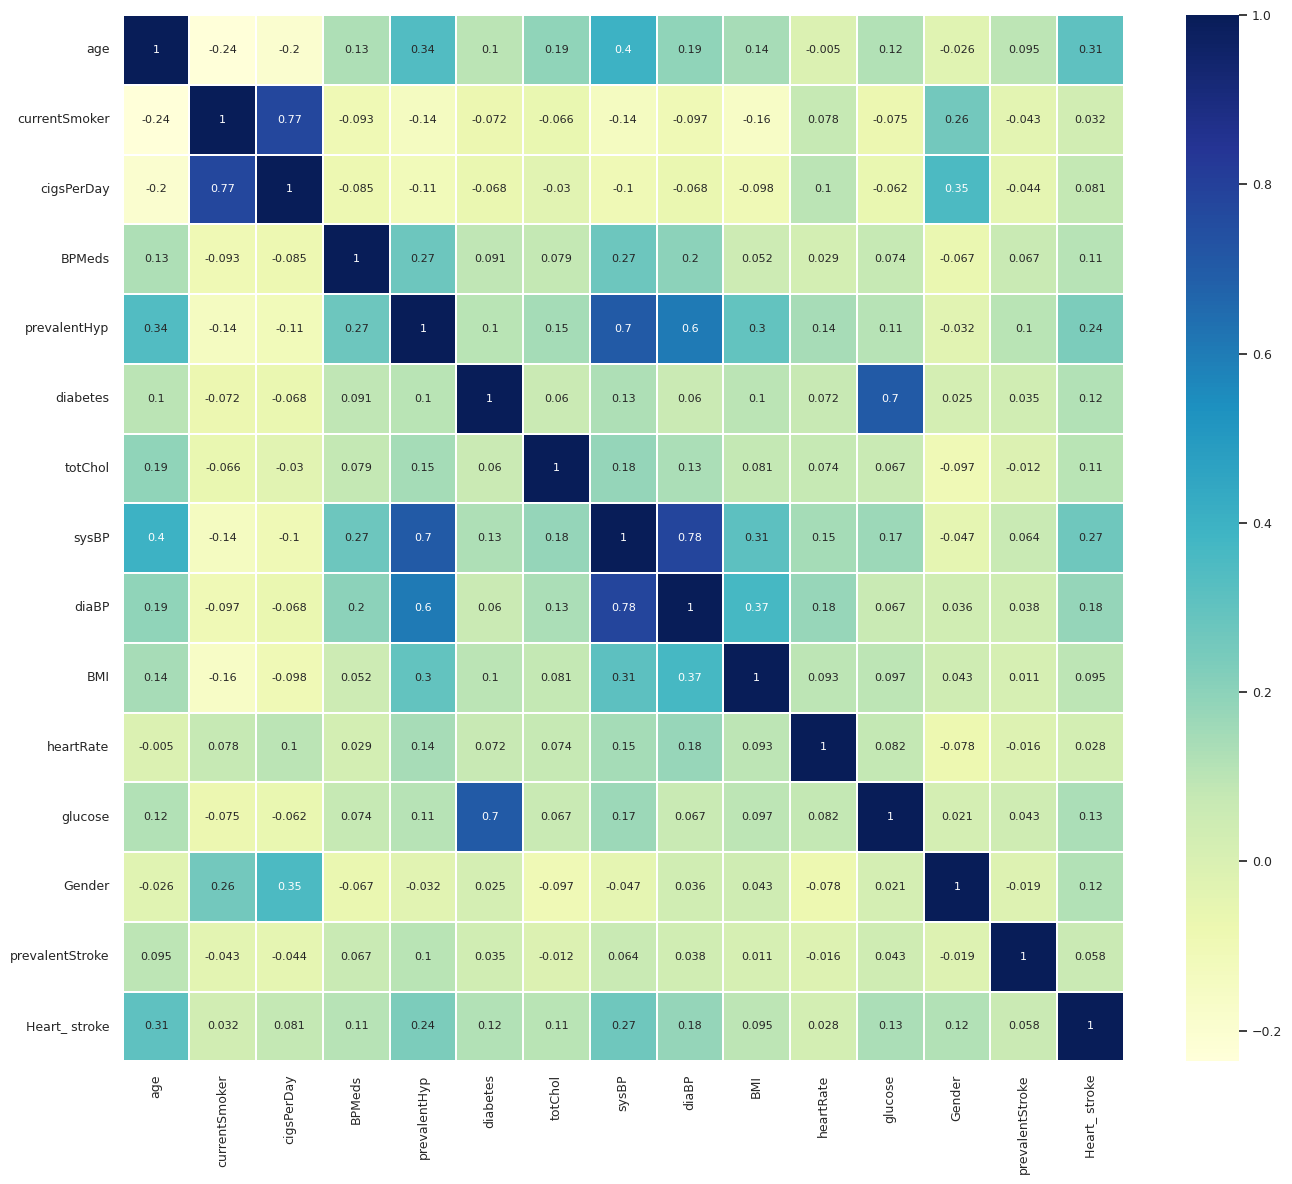

In [24]:
#Visualize mô hình thể hiện mối tương quan giữa các thuộc tính
plt.figure(figsize=(14,12))
sns.heatmap(upsampled.corr(),linewidths=.1,cmap="YlGnBu", annot=True, annot_kws={"size": 8})
plt.yticks(rotation=0);
plt.savefig("corr.png", format='png', dpi=100, bbox_inches='tight')
files.download('corr.png') 
plt.show()

In [25]:
# Segregating the Dependent Variable in Y-axis and Independent Variables in X-axis

X = upsampled.drop(columns=["Heart_ stroke"])
y = upsampled["Heart_ stroke"]

## Scaling the data
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

In [29]:
## Splitting the Data
from sklearn.model_selection import train_test_split
## We split the data into train & test sets in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0, stratify=y)

print('='*34, '\n', f'\033[94mTrain data & Test data shapes', '\n', f'\033[94m '*14, f'\033[94mX            y')
print('='*34, '\n', f'\033[94mTrain data | ', X_train.shape, y_train.shape, '\n', f'\033[94mTest data  | ', X_test.shape, y_test.shape)

 Train data & Test data shapes 
                X            y
 Train data |  (5750, 14) (5750,) 
 Test data  |  (1438, 14) (1438,)


In [30]:

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier as DT
dt = DT(criterion='entropy',random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [32]:
y_pred_dt = dt.predict(X_test)

In [33]:
from sklearn.model_selection import cross_val_predict, cross_val_score

print("TEST RESULTS:\n")
#Report
print('Decision Tree Classifier Report:\n\n{}\n'.format(classification_report(y_test, y_pred_dt)))
res = cross_val_score(dt, X_test, y_test, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,dt.predict(X_test))))
#Điểm chính xác
print("Accuracy Score:\t\t{}%".format(round(dt.score(X_test, y_test)*100, 2)))


TEST RESULTS:

Decision Tree Classifier Report:

              precision    recall  f1-score   support

           0       0.98      0.83      0.90       719
           1       0.85      0.98      0.91       719

    accuracy                           0.91      1438
   macro avg       0.92      0.91      0.90      1438
weighted avg       0.92      0.91      0.90      1438


Average Accuracy:	0.7413

Standard Deviation:	0.0357

Confusion Matrix:
[[594 125]
 [ 11 708]]

Accuracy Score:		90.54%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

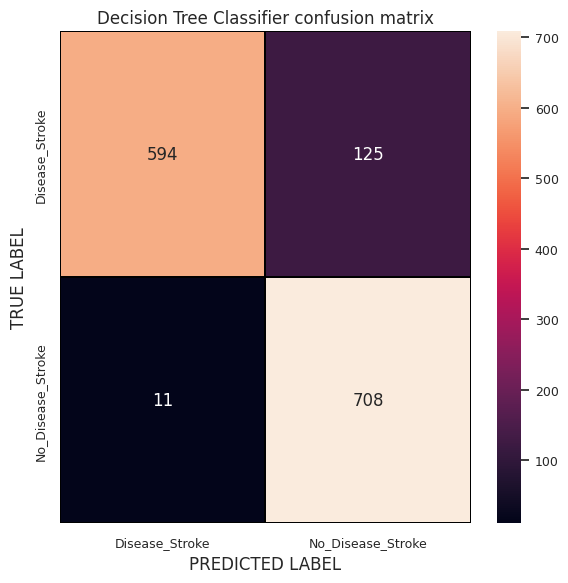

In [36]:
#Visualize Confusion Matrix (Ma trận hỗn hợp)
cfm_dt = confusion_matrix(y_test, y_pred_dt)
x_axis_labels = ["Disease_Stroke", "No_Disease_Stroke"]
y_axis_labels = ["Disease_Stroke", "No_Disease_Stroke"]

f, ax = plt.subplots(figsize =(6,6))
sns.heatmap(cfm_dt, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('TRUE LABEL')
plt.xlabel('PREDICTED LABEL');
plt.savefig("dtcm.png", format='png', dpi=150, bbox_inches='tight')
files.download('dtcm.png')
plt.show()
#(edible:0 poisonous:1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

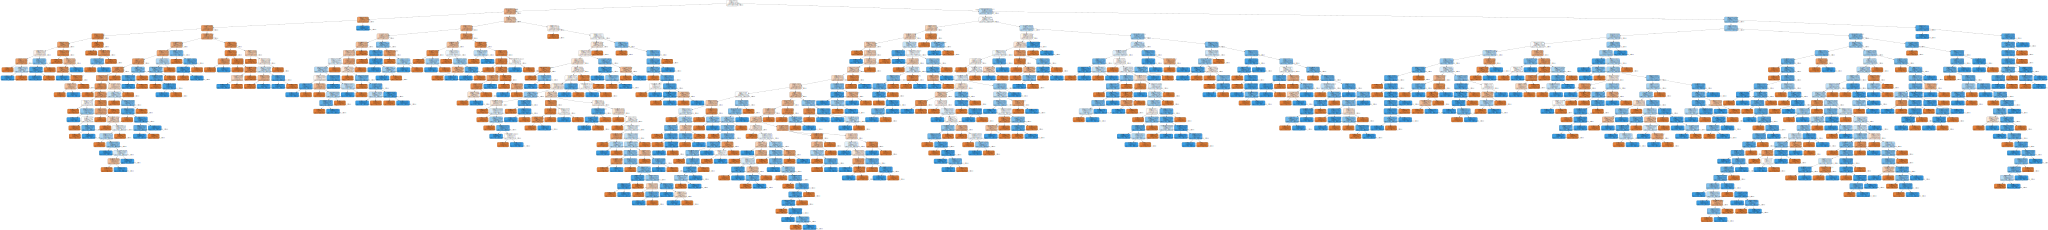

In [38]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
Y_name = ['Diasease_Stroke','No_Diasease_Stroke']
dot_data = export_graphviz(dt, out_file=None, 
                         feature_names=X.columns,
                         class_names=Y_name, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render(filename='DecisionTree.png')
files.download('DecisionTree.png')
graph

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

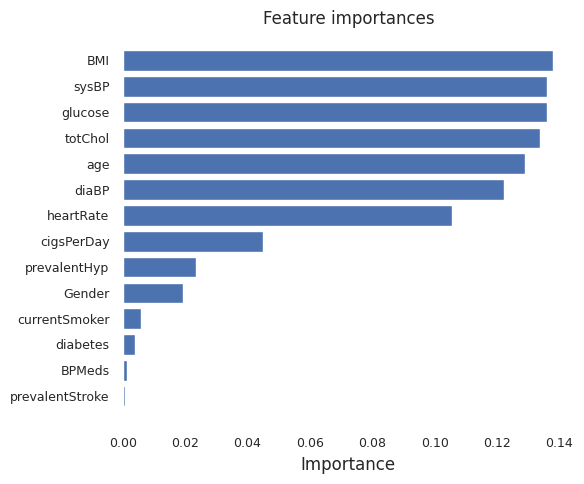

In [39]:
#Visualize biểu đồ thể hiện các đặc tính quan trọng trong bộ dữ liệu Mushrooms
features_list = X.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(6,5))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.savefig("featureimp.png", format='png', dpi=100, bbox_inches='tight')
files.download('featureimp.png')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

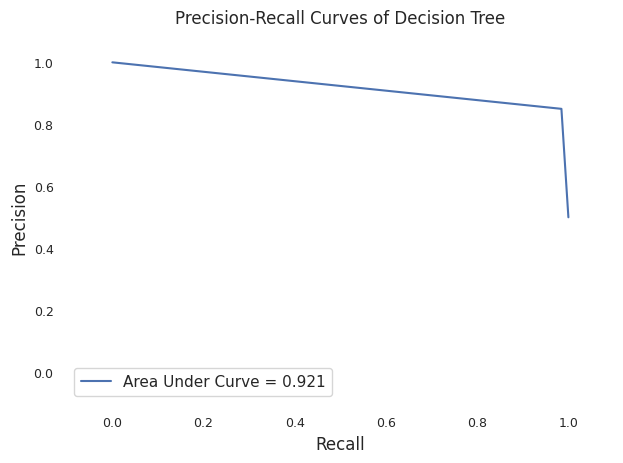

In [40]:
#Visualize đồ thị đường cong PR (Precision-Recall Curves)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_dt)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall Curves of Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
plt.savefig("dtpr.png", format='png', dpi=150, bbox_inches='tight')
files.download('dtpr.png')
plt.show()

# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier as RF
rf = RF(n_estimators = 50, criterion = 'entropy', random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [42]:
y_pred_rf = rf.predict(X_test)

In [43]:
from sklearn.model_selection import cross_val_predict, cross_val_score

print("TEST RESULTS:\n")
#Report
print('Random Forest Classifier report:\n\n{}\n'.format(classification_report(y_test, y_pred_rf)))
res = cross_val_score(rf, X_test, y_test, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,rf.predict(X_test))))
#Điểm chính xác
print("Accuracy Score:\t\t{}%".format(round(rf.score(X_test, y_test)*100, 2)))

TEST RESULTS:

Random Forest Classifier report:

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       719
           1       0.93      0.99      0.96       719

    accuracy                           0.96      1438
   macro avg       0.96      0.96      0.96      1438
weighted avg       0.96      0.96      0.96      1438


Average Accuracy:	0.7768

Standard Deviation:	0.0335

Confusion Matrix:
[[668  51]
 [  7 712]]

Accuracy Score:		95.97%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

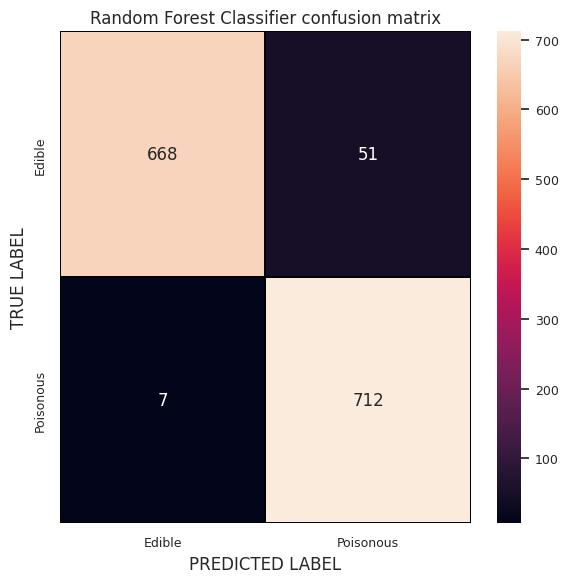

In [47]:
#Visualize Confusion Matrix (Ma trận hỗn hợp)
cfm_rf = confusion_matrix(y_test, y_pred_rf)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(6,6))
sns.heatmap(cfm_rf, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Random Forest Classifier confusion matrix')
plt.ylabel('TRUE LABEL')
plt.xlabel('PREDICTED LABEL');
plt.savefig("rfcm.png", format='png', dpi=150, bbox_inches='tight')
files.download('rfcm.png')
plt.show()
#(edible:0 poisonous:1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

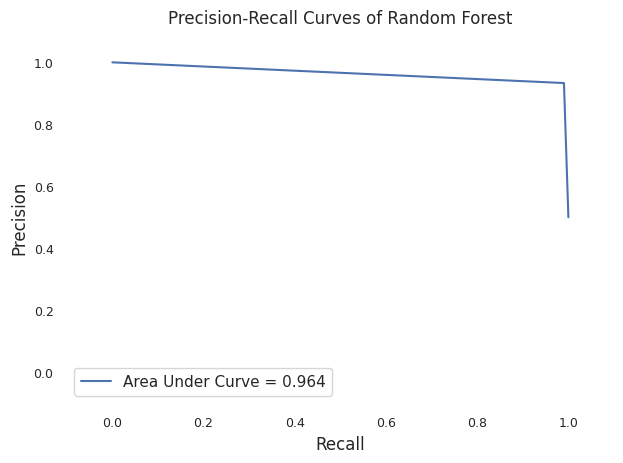

In [48]:
#Visualize đồ thị đường cong PR (Precision-Recall Curves)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall Curves of Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
plt.savefig("rfpr.png", format='png', dpi=150, bbox_inches='tight')
files.download('rfpr.png')
plt.show()

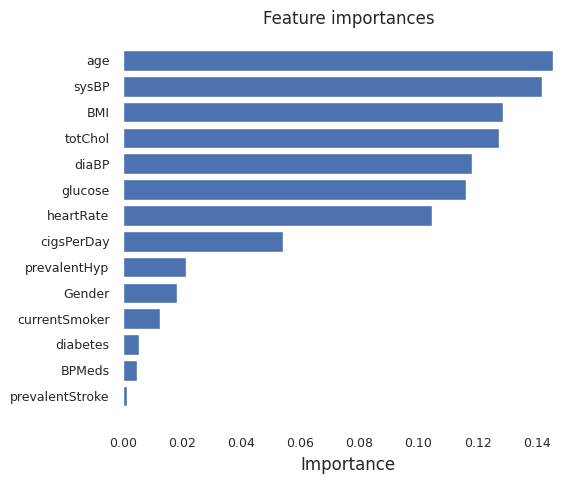

In [46]:
# Visualize biểu đồ thể hiện các đặc tính quan trọng trong bộ dữ liệu Mushrooms
features_list = X.columns.values
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(6,5))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
#plt.savefig("featureimp.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score

print("TEST RESULTS:\n")
#Report
print('K-Nearest Neighbors report:\n\n{}\n'.format(classification_report(y_test, y_pred_knn)))
res = cross_val_score(knn, X_test, y_test, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,knn.predict(X_test))))
#Điểm chính xác
print("Accuracy Score:\t\t{}%".format(round(knn.score(X_test, y_test)*100, 2)))

TEST RESULTS:

K-Nearest Neighbors report:

              precision    recall  f1-score   support

           0       0.88      0.64      0.74       719
           1       0.72      0.92      0.80       719

    accuracy                           0.78      1438
   macro avg       0.80      0.78      0.77      1438
weighted avg       0.80      0.78      0.77      1438


Average Accuracy:	0.6343

Standard Deviation:	0.0324

Confusion Matrix:
[[461 258]
 [ 61 658]]

Accuracy Score:		77.82%


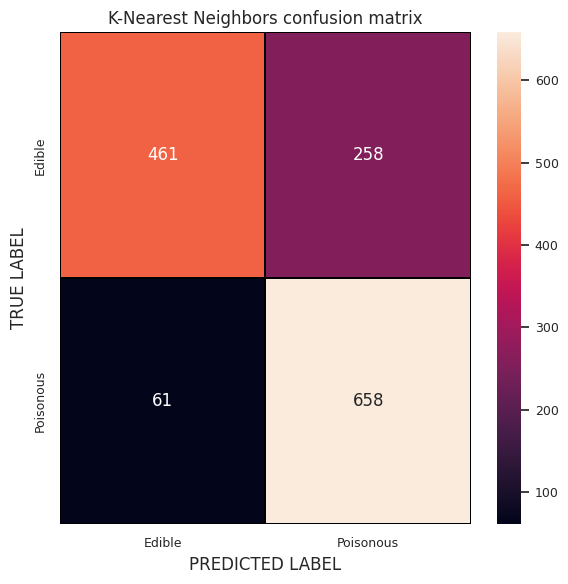

In [ ]:
#Visualize Confusion Matrix (Ma trận hỗn hợp)
cfm_knn = confusion_matrix(y_test, y_pred_knn)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(6,6))
sns.heatmap(cfm_knn, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('K-Nearest Neighbors confusion matrix')
plt.ylabel('TRUE LABEL')
plt.xlabel('PREDICTED LABEL');
#plt.savefig("knncm.png", format='png', dpi=150, bbox_inches='tight')
plt.show()
#(edible:0 poisonous:1)

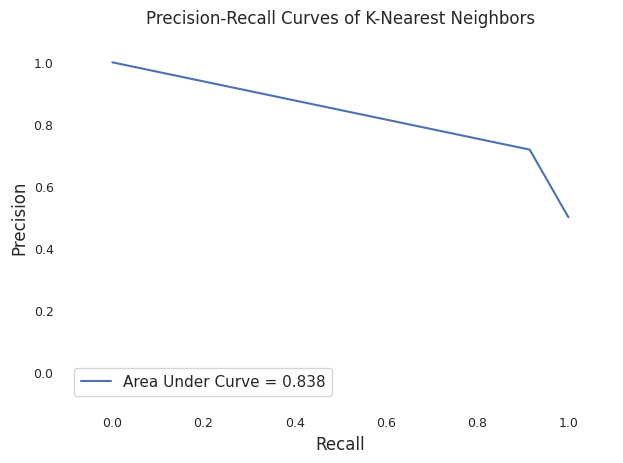

In [ ]:
#Visualize đồ thị đường cong PR (Precision-Recall Curves)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_knn)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall Curves of K-Nearest Neighbors')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
#plt.savefig("knnpr.png", format='png', dpi=150, bbox_inches='tight')
plt.show()

# ROC Curves

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

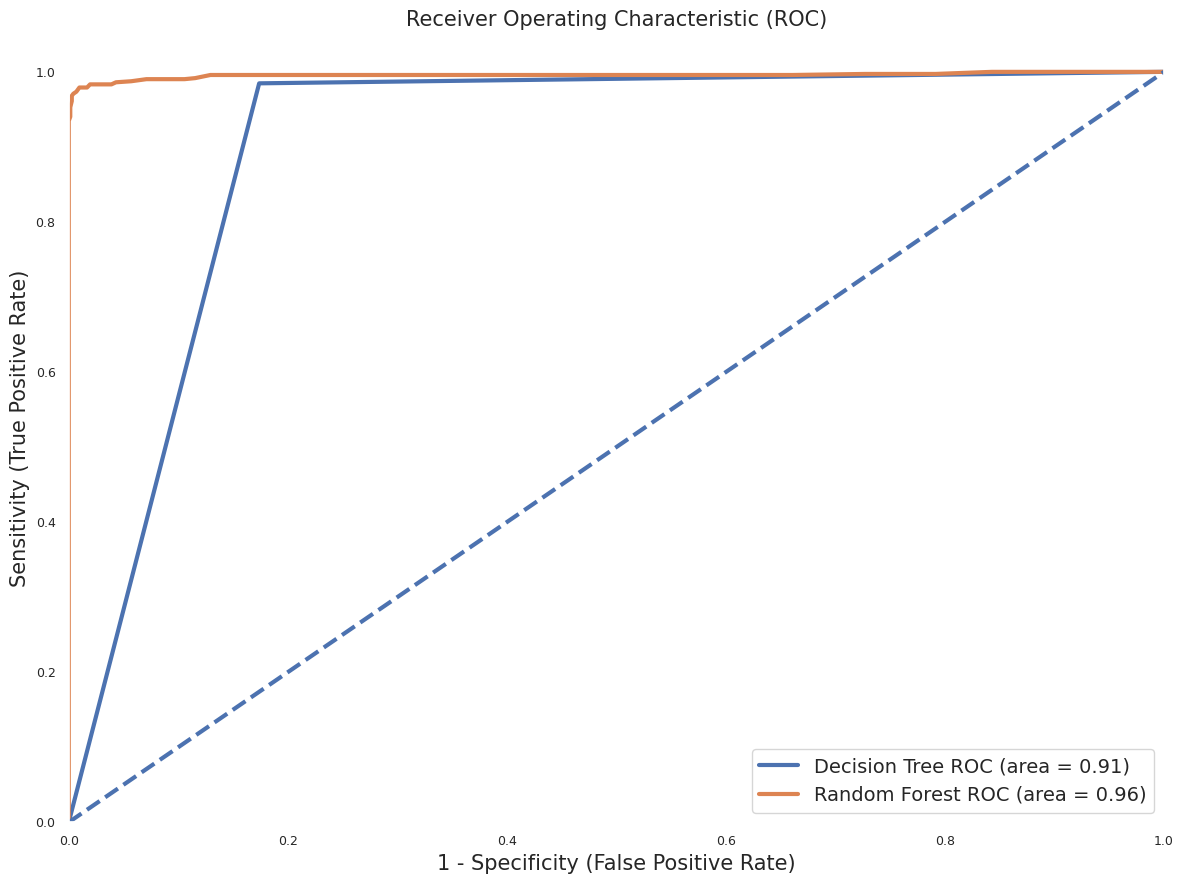

In [49]:
#Visualize mô hình ROC (Receiver Operating Characteristic) Curves - so sánh trực quan các mô hình phân loại
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

plt.figure(figsize=(12,9))
models = [
{
    'label': 'Decision Tree',
    'model': dt,
},
{
    'label': 'Random Forest',
    'model': rf,
},
#{
#    'label': 'K-Nearest Neighbors',
#    'model': knn,
#}
]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr, tpr, linestyle='-', linewidth=3, label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'b--', linewidth=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=15)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=15)
plt.legend(loc="lower right", fontsize=14)
plt.savefig("roc_curves.png", format='png', dpi=100, bbox_inches='tight')
files.download('roc_curves.png')
plt.show()